# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [41]:
petrol_df = pd.read_csv("petrol.csv")
petrol_df.head(5)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [42]:
petrol_df.shape

(48, 5)

In [43]:
petrol_df.dtypes

tax             float64
 income           int64
 highway          int64
 dl             float64
 consumption      int64
dtype: object

In [44]:
petrol_df.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

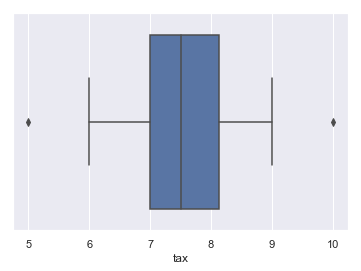

In [45]:
sns.boxplot(petrol_df['tax'])

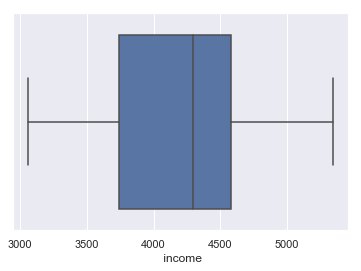

In [10]:
sns.boxplot(petrol_df[' income'])

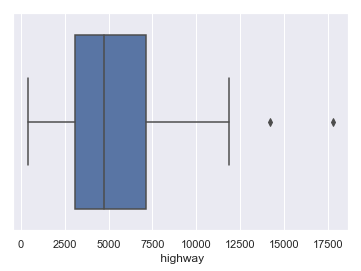

In [11]:
sns.boxplot(petrol_df[' highway'])

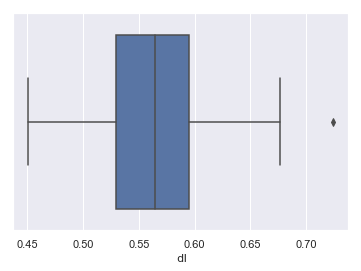

In [8]:
sns.boxplot(petrol_df[' dl'])

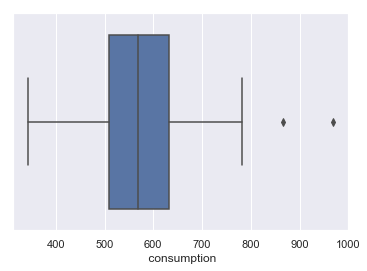

In [12]:
sns.boxplot(petrol_df[' consumption'])

In [46]:
Q1 = petrol_df.quantile(0.25)
Q3 = petrol_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

tax                1.1250
 income          839.7500
 highway        4045.7500
 dl                0.0655
 consumption     123.2500
dtype: float64


In [47]:
print((petrol_df < (Q1 - 1.5 * IQR)) |(petrol_df > (Q3 + 1.5 * IQR)))

      tax   income   highway     dl   consumption
0   False    False     False  False         False
1   False    False     False  False         False
2   False    False     False  False         False
3   False    False     False  False         False
4   False    False     False  False         False
5    True    False     False  False         False
6   False    False     False  False         False
7   False    False     False  False         False
8   False    False     False  False         False
9   False    False     False  False         False
10  False    False     False  False         False
11  False    False      True  False         False
12  False    False     False  False         False
13  False    False     False  False         False
14  False    False     False  False         False
15  False    False     False  False         False
16  False    False     False  False         False
17  False    False     False  False         False
18  False    False     False   True          True


In [48]:
petrol_df_out = petrol_df[~((petrol_df < (Q1 - 1.5 * IQR)) |(petrol_df > (Q3 + 1.5 * IQR))).any(axis=1)]
petrol_df_out.shape

(43, 5)

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [49]:
corr = petrol_df_out.corr()
corr

,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [50]:
petrol_df_out.columns #note the column names have an extra space in front of them except the 'tax' column

Index(['tax', ' income', ' highway', ' dl', ' consumption'], dtype='object')

In [51]:
y = petrol_df_out[' consumption']
#X = petrol_df_out.drop(' consumption',axis=1)
X = petrol_df_out[['tax',' dl']]

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [53]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(34, 2) (34,)
(9, 2) (9,)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [54]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
#regression_model.fit(X_train, y_train)
regression_model.fit(X, y)

coeff_df = pd.DataFrame(regression_model.coef_, X.columns, columns=['Coefficient'])  
coeff_df.T

,tax,dl
Coefficient,-29.438974,897.303561


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [55]:
lm = LinearRegression()
results = lm.fit(X,y)
y_pred = lm.predict(X_test)

In [56]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
3,414,538.177721
2,561,539.781742
27,631,583.042899
45,510,531.706010
20,649,673.135885
33,628,554.329185
25,566,507.478814
41,699,583.405529
35,644,654.991933


In [57]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 55.330375586644585
Mean Squared Error: 4617.6576487448365
Root Mean Squared Error: 67.95334906202075


In [58]:
results.score(X,y)

0.4456584967389009

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [59]:
y = petrol_df_out[' consumption']
X = petrol_df_out.drop(' consumption',axis=1)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [61]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
#regression_model.fit(X_train, y_train)
regression_model.fit(X, y)

coeff_df = pd.DataFrame(regression_model.coef_, X.columns, columns=['Coefficient'])  
coeff_df.T

,tax,income,highway,dl
Coefficient,-35.862824,-0.07281,-0.002078,983.226067


In [62]:
lm = LinearRegression()
results = lm.fit(X,y)
y_pred = lm.predict(X_test)

In [63]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
3,414,492.593862
2,561,563.707495
27,631,602.370643
45,510,505.476469
20,649,651.053530
33,628,616.775534
25,566,532.230250
41,699,628.951006
35,644,690.278786


In [64]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 30.869974587870324
Mean Squared Error: 1704.8463599933757
Root Mean Squared Error: 41.28978517737015


In [65]:
# R^2
results.score(X,y)

0.6639367664384643

# Question 9: Print the coefficients of the multilinear regression model

In [66]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X, y)

coeff_df = pd.DataFrame(regression_model.coef_, X.columns, columns=['Coefficient'])  
coeff_df.T

,tax,income,highway,dl
Coefficient,-35.862824,-0.07281,-0.002078,983.226067


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

### R squared value increases if we increase the number of independent variables in our analysis.
### this is because R2 = 1 - (SSE/SST) 
### R squared will be maximum when SSE/SST would be minimum
### in order for SSE/SST to be minimum SSE should be minimum
### Now SSE will decrease as we add more explanatory variables to our model. This is because as we add more explanatory variables to our regression model, our regression model will fit the data points better and hence sum of squared error will reduce. Hence R-squared will increase even when the variable is not significant to our model.